# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/ML%20spring%202023/Module%2010-%20Bagging%20and%20Boosting/Python/bagging/RF_regression_Loganhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Random Forest Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Logan_housing.csv')

In [4]:
df.head(10)

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0
5,299900,130,2,0,No,NW,Cache,Conventional,6,3,2765,1926,84335,2018,9,0
6,424000,463,6,0,No,NW,Cache,Conventional,4,4,5000,1933,84335,2019,12,0
7,775000,37,2,0,No,SE,Cache,Conventional,5,4,5180,1999,84328,2020,8,0
8,611000,38,2,0,No,SE,Cache,VA,5,3,4308,2015,84328,2020,11,1
9,1131310,115,2,0,Yes,SE,Cache,Cash,4,2,2116,1985,84328,2020,4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

First we need to see if any data is missing

In [6]:
df.isnull().sum()/len(df)

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

Looks good!
Now let's see if there are any duplicates!

In [7]:
sum(df.duplicated())

2

In [8]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [9]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

---

## Encode ordinal categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handel ordinal data. We should transform ordinal categorical variables into quantitative variables. 

In [12]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [13]:
ordinal_categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip']

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [16]:
df[ordinal_categorical]= enc.fit_transform(df[ordinal_categorical])

In [17]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,0.0,1.0,0.0,2.0,3,1,1031,1974,12.0,2018,9,0
1,225000,6,2,0,0.0,1.0,0.0,1.0,4,2,2091,1995,12.0,2018,7,0
2,274900,14,2,0,0.0,1.0,0.0,1.0,3,1,2016,1980,12.0,2018,11,0
3,175000,16,1,0,0.0,1.0,0.0,4.0,4,1,1920,1978,12.0,2018,6,0
4,179000,29,0,0,0.0,1.0,0.0,0.0,4,2,1329,1976,12.0,2018,9,0


In [18]:
enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['NE', 'NW', 'SE', 'SW'], dtype=object),
 array(['Cache', 'Logan'], dtype=object),
 array(['Cash', 'Conventional', 'FHA', 'Other', 'USDA Rural Development',
        'VA'], dtype=object),
 array([84305, 84308, 84318, 84319, 84320, 84321, 84325, 84326, 84327,
        84328, 84332, 84333, 84335, 84338, 84339, 84341], dtype=int64)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4108 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sold Price         4108 non-null   int64  
 1   DOM                4108 non-null   int64  
 2   Garage Capacity    4108 non-null   int64  
 3   HOA Fee            4108 non-null   int64  
 4   Irregular Shape    4108 non-null   float64
 5   Quadrant           4108 non-null   float64
 6   School District    4108 non-null   float64
 7   Sold Terms         4108 non-null   float64
 8   Total Bedrooms     4108 non-null   int64  
 9   Total Bathrooms    4108 non-null   int64  
 10  Total Square Feet  4108 non-null   int64  
 11  Year Built         4108 non-null   int64  
 12  Zip                4108 non-null   float64
 13  year_sold          4108 non-null   int64  
 14  month_sold         4108 non-null   int64  
 15  built_after_2000   4108 non-null   int64  
dtypes: float64(5), int64(11)

In [20]:
df.drop('built_after_2000', axis=1, inplace=True) #why?

In [21]:
df.shape


(4108, 15)

Remember, with other machine learning models, we ended up with **58 features** using the same data set because we had to transform categorical variables into dummies. But with RF, there is only **14 features** to work with. 

### Scaling features
In random forest, we don't need to scale the features!! 

### Defining the variables and splitting the data

In [22]:
rand_state = 1000

In [23]:
y = df['Sold Price']
X = df.drop('Sold Price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Random Forest Regression with Sklearn

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [27]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)


In [28]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4086,234500,262465.62
2938,200685,208367.15
175,345500,383041.50
1940,230000,229644.23
1763,299000,379370.31


---
## Evaluating the model performance on test data

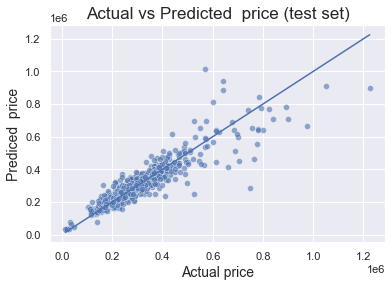

In [29]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs Predicted  price (test set)', fontsize=17)
plt.show()

In [30]:
np.round(RF_regression.score(X_test, y_test),4)

0.8379

Reminder: The $R^2$ using an SVM model was around 73%. Vanilla base RF is outperforming SVM. 

In [31]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

46398.65

---

## Tuning hyperparameters: 

The key configuration parameters include the various hyperparameters for the individual decision trees introduced in the decision tree notebook. 

The following tables lists additional options for the two `RandomForest` classes:


| Keyword      | Default | Description                                                                                                                |
|--------------|---------|----------------------------------------------------------------------------------------------------------------------------|
| bootstrap    | True    | Bootstrap samples during training                                                                                          |
| n_estimators | 10      | # trees in the forest.                                                                                                     |
| oob_score    | False   | Use out-of-bag samples to estimate the R2 on unseen data                                                                   |
| max_features | auto    | The number of features to consider when looking for the best split                                                         |


- The `bootstrap` parameter activates in the preceding bagging algorithm outline, which in turn enables the computation of the out-of-bag score (oob_score) that estimates the generalization accuracy using samples not included in the bootstrap sample used to train a given tree (see next section for detail). 
- The `n_estimators` parameter defines the number of trees to be grown as part of the forest. Larger forests perform better, but also take more time to build. It is important to monitor the cross-validation error as a function of the number of base learners to identify when the marginal reduction of the prediction error declines and the cost of additional training begins to outweigh the benefits.
- The `max_features` parameter controls the size of the randomly selected feature subsets available when learning a new decision rule and split a node. A lower value reduces the correlation of the trees and, thus, the ensemble's variance, but may also increase the bias. Good starting values are `n_features` (the number of training features) for regression problems and `sqrt(n_features)` for classification problems, but will depend on the relationships among features and should be optimized using cross-validation.

Random forests are designed to contain deep fully-grown trees, which can be created using `max_depth=None` and `min_samples_split=2`. However, these values are not necessarily optimal, especially for high-dimensional data with many samples and, consequently, potentially very deep trees that can become very computationally-, and memory-, intensive.

The `RandomForest` class provided by sklearn support parallel training and prediction by setting the n_jobs parameter to the k number of jobs to run on different cores. The -1 value uses all available cores. The overhead of interprocess communication may limit the speedup from being linear so that k jobs may take more than 1/k the time of a single job. Nonetheless, the speedup is often quite significant for large forests or deep individual trees that may take a meaningful amount of time to train when the data is large, and split evaluation becomes costly.

As always, the best parameter configuration should be identified using cross-validation. The following steps illustrate the process:

### Gridsearch


In [32]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [35]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   0.7s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [37]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [38]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [39]:
y_hat_optimized = grid.predict(X_test)

In [40]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4086,234500,262465.62,263663.561524
2938,200685,208367.15,217316.819728
175,345500,383041.50,389525.313035
1940,230000,229644.23,217183.862310
1763,299000,379370.31,368291.758000


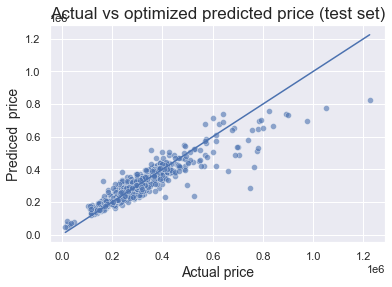

In [41]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [42]:
np.round(grid.score(X_test, y_test),4)

0.8486

In [43]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

44850.32

- Compared to numbers before using gridsearch (R2= 0.8379 and RMSE= 46398), this is a slight improvement!
- Recall: the best we could do with SVM was R2=80. So RF outperforms SVM!

---
## Using Cross validation and OOB observations to estimate the $R^2$ in the test set. 

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [46]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.7821

---

### Out-of-Bag errors!

We can show that on average, each bagged tree makes use of around 2/3 of the observations and 1/3 of them are not used to fit the model. These left out observations are called out-of-bag (OOB) observations. It turns out there is a very straightforward way to estimate the test errors using OOB observations. 

In [47]:
np.random.choice(100,size=100)

array([27, 92, 24, 86, 59,  7, 26, 50, 16, 89, 21, 15, 41, 49, 67, 51, 21,
       58, 41, 71, 57, 67, 58, 76, 58,  1, 64, 85,  0, 49, 45, 33, 63, 47,
       18, 73, 28, 34, 13, 56, 87,  6, 56,  0, 96, 20, 94, 34,  9, 15,  7,
       10, 55, 38, 35, 80, 84, 83, 32, 31, 67, 57, 97, 21, 38, 63, 91, 74,
       64, 43, 79, 51, 28, 27, 31, 82, 42, 80, 14, 40, 65, 56, 51, 55, 82,
       26, 17,  0, 64, 14, 19, 48,  3, 91, 49,  9,  4, 14, 15, 19])

In [62]:
np.unique(np.random.choice (100,size=100)).size

63

In [63]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [64]:
RF_oob.oob_score_

0.7802239278796058

---

### Feature Importance

In [67]:
features = list(X_train.columns)
features

['DOM',
 'Garage Capacity',
 'HOA Fee',
 'Irregular Shape',
 'Quadrant',
 'School District',
 'Sold Terms',
 'Total Bedrooms',
 'Total Bathrooms',
 'Total Square Feet',
 'Year Built',
 'Zip',
 'year_sold',
 'month_sold']

In [68]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [69]:
importance = RF_Regressor.feature_importances_
importance

array([0.04270873, 0.15762993, 0.04294991, 0.00981058, 0.02096636,
       0.01890072, 0.02908753, 0.0855662 , 0.10733285, 0.34693044,
       0.05790082, 0.02612978, 0.02678065, 0.02730549])

In [70]:
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
3,Irregular Shape,0.009811
5,School District,0.018901
4,Quadrant,0.020966
11,Zip,0.026130
12,year_sold,0.026781
13,month_sold,0.027305
6,Sold Terms,0.029088
0,DOM,0.042709
2,HOA Fee,0.042950
10,Year Built,0.057901


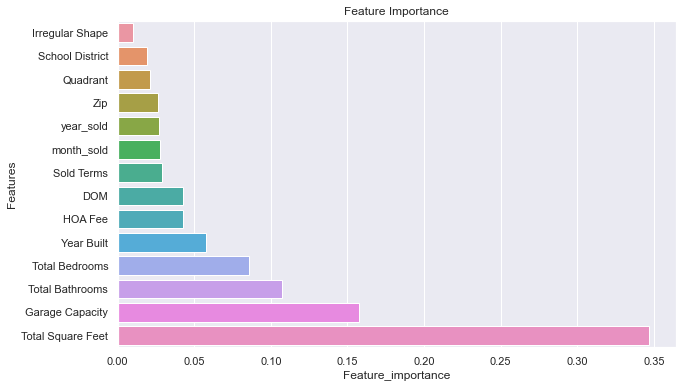

In [71]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

---
---

## Does more important feature mean more significant?

In [72]:
import statsmodels.api as sm

In [73]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [74]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [75]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sold Price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     630.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:12:42   Log-Likelihood:                -35655.
No. Observations:                2875   AIC:                         7.134e+04
Df Residuals:                    2860   BIC:                         7.143e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.985e+07   2.75e+06    -18.151      0.000   -5.52e+07   -4.45e+07
DOM                 -55.1928     22.736     -2.428      0.015     -99.773     -10.612
Garage Capacity    1.942e+04   1286.898     15.088      0.000    1.69e+04    2.19e+04
HOA Fee               1.0187     17.429      0.058      0.953     -33.156      35.194
Irregular Shape    1.348e+04   3881.799      3.472      0.001    5866.477    2.11e+04
Quadrant           5508.5054   1044.865      5.272      0.000    3459.741    7557.270
School District   -7499.6621   2558.191     -2.932      0.003   -1.25e+04   -2483.577
Sold Terms         -660.7414    977.467     -0.676      0.499   -2577.353    1255.870
Total Bedrooms     1000.4834   1345.759      0.743      0.457   -1638.272    3639.239
Total Bathrooms    2022.8305   1987.773      1.018      0.309   -1874.783    5920.444
Total Square Feet    80.6931      1.752     46.065      0.000      77.258      84.128
Year Built          113.5147     45.989      2.468      0.014      23.340     203.689
Zip                 459.4171    268.915      1.708      0.088     -67.869     986.703
year_sold          2.459e+04   1361.057     18.065      0.000    2.19e+04    2.73e+04
month_sold         2835.0534    365.969      7.747      0.000    2117.464    3552.643
==============================================================================
Omnibus:                     3540.895   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1530235.354
Skew:                           6.092   Prob(JB):                         0.00
Kurtosis:                     115.364   Cond. No.                     9.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install --pre pycaret

In [ ]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/wage.csv")

In [ ]:
df_py = df.copy()

In [ ]:
df_py.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [ ]:
from pycaret.regression import *


In [ ]:
setup(data=df_py,  target='wage', session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,wage
2,Target type,Regression
3,Data shape,"(935, 11)"
4,Train data shape,"(654, 11)"
5,Test data shape,"(281, 11)"
6,Numeric features,10
7,Rows with missing values,22.8%
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [ ]:
dt_reg = create_model(estimator='dt') 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:26:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36142.4242,2468503030.3030,49684.0319,-0.7638,0.5290,0.4917
1,38395.4545,2658098333.3333,51556.7487,-0.5064,0.4961,0.4125
2,44678.7879,3073808484.8485,55441.9380,-1.2802,0.5812,0.4987
3,35643.9394,2380268030.3030,48787.9906,-0.1683,0.4981,0.4142
4,53752.3077,5314083538.4615,72897.7609,-0.7920,0.6155,0.6571
5,36969.2308,2763442461.5385,52568.4550,-0.3655,0.4841,0.4079
6,37198.4615,2623885692.3077,51223.8781,-0.9103,0.5075,0.4559
7,36895.3846,2451237230.7692,49509.9710,-1.1426,0.4742,0.4478
8,40046.1538,2493926769.2308,49939.2308,-1.0871,0.5469,0.4941


In [ ]:
tuned_dt_reg = tune_model(dt_reg)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:26:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29468.4346,1427064117.9813,37776.5022,-0.0197,0.4370,0.4227
1,27319.1090,1585105975.9273,39813.3894,0.1017,0.3604,0.2974
2,26293.5937,1244348778.3431,35275.3282,0.0769,0.3864,0.3300
3,27803.2711,1474267155.1511,38396.1867,0.2764,0.3738,0.3442
4,34061.8327,2628225263.9633,51266.2195,0.1137,0.4706,0.4226
5,29745.6769,1793627884.1350,42351.2442,0.1137,0.3740,0.3196
6,30943.9671,1393939671.0679,37335.5015,-0.0149,0.4188,0.3853
7,27210.6493,1139288033.6286,33753.3411,0.0042,0.3752,0.3628
8,26294.6356,1151950382.1688,33940.3945,0.0360,0.4031,0.3443


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [ ]:
plot_model(tuned_dt_reg, plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,3
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.002
min_samples_leaf,3
min_samples_split,10
min_weight_fraction_leaf,0.0
random_state,555


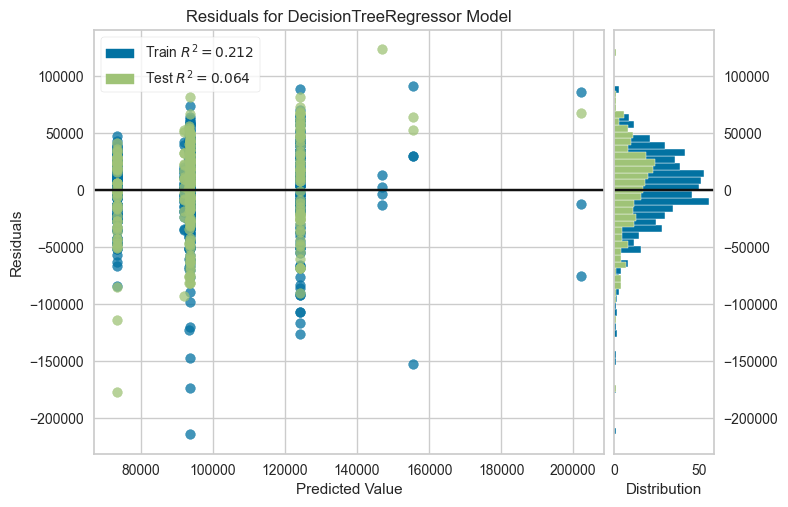

In [ ]:
plot_model(tuned_dt_reg, plot = 'residuals')

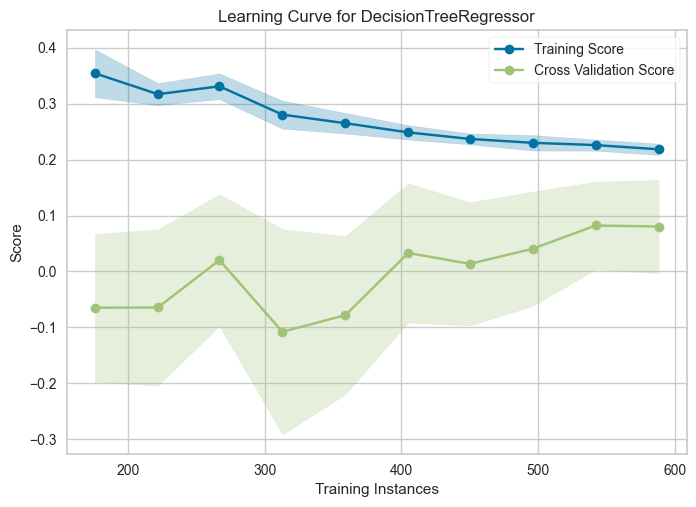

In [ ]:
plot_model(tuned_dt_reg, plot = 'learning')

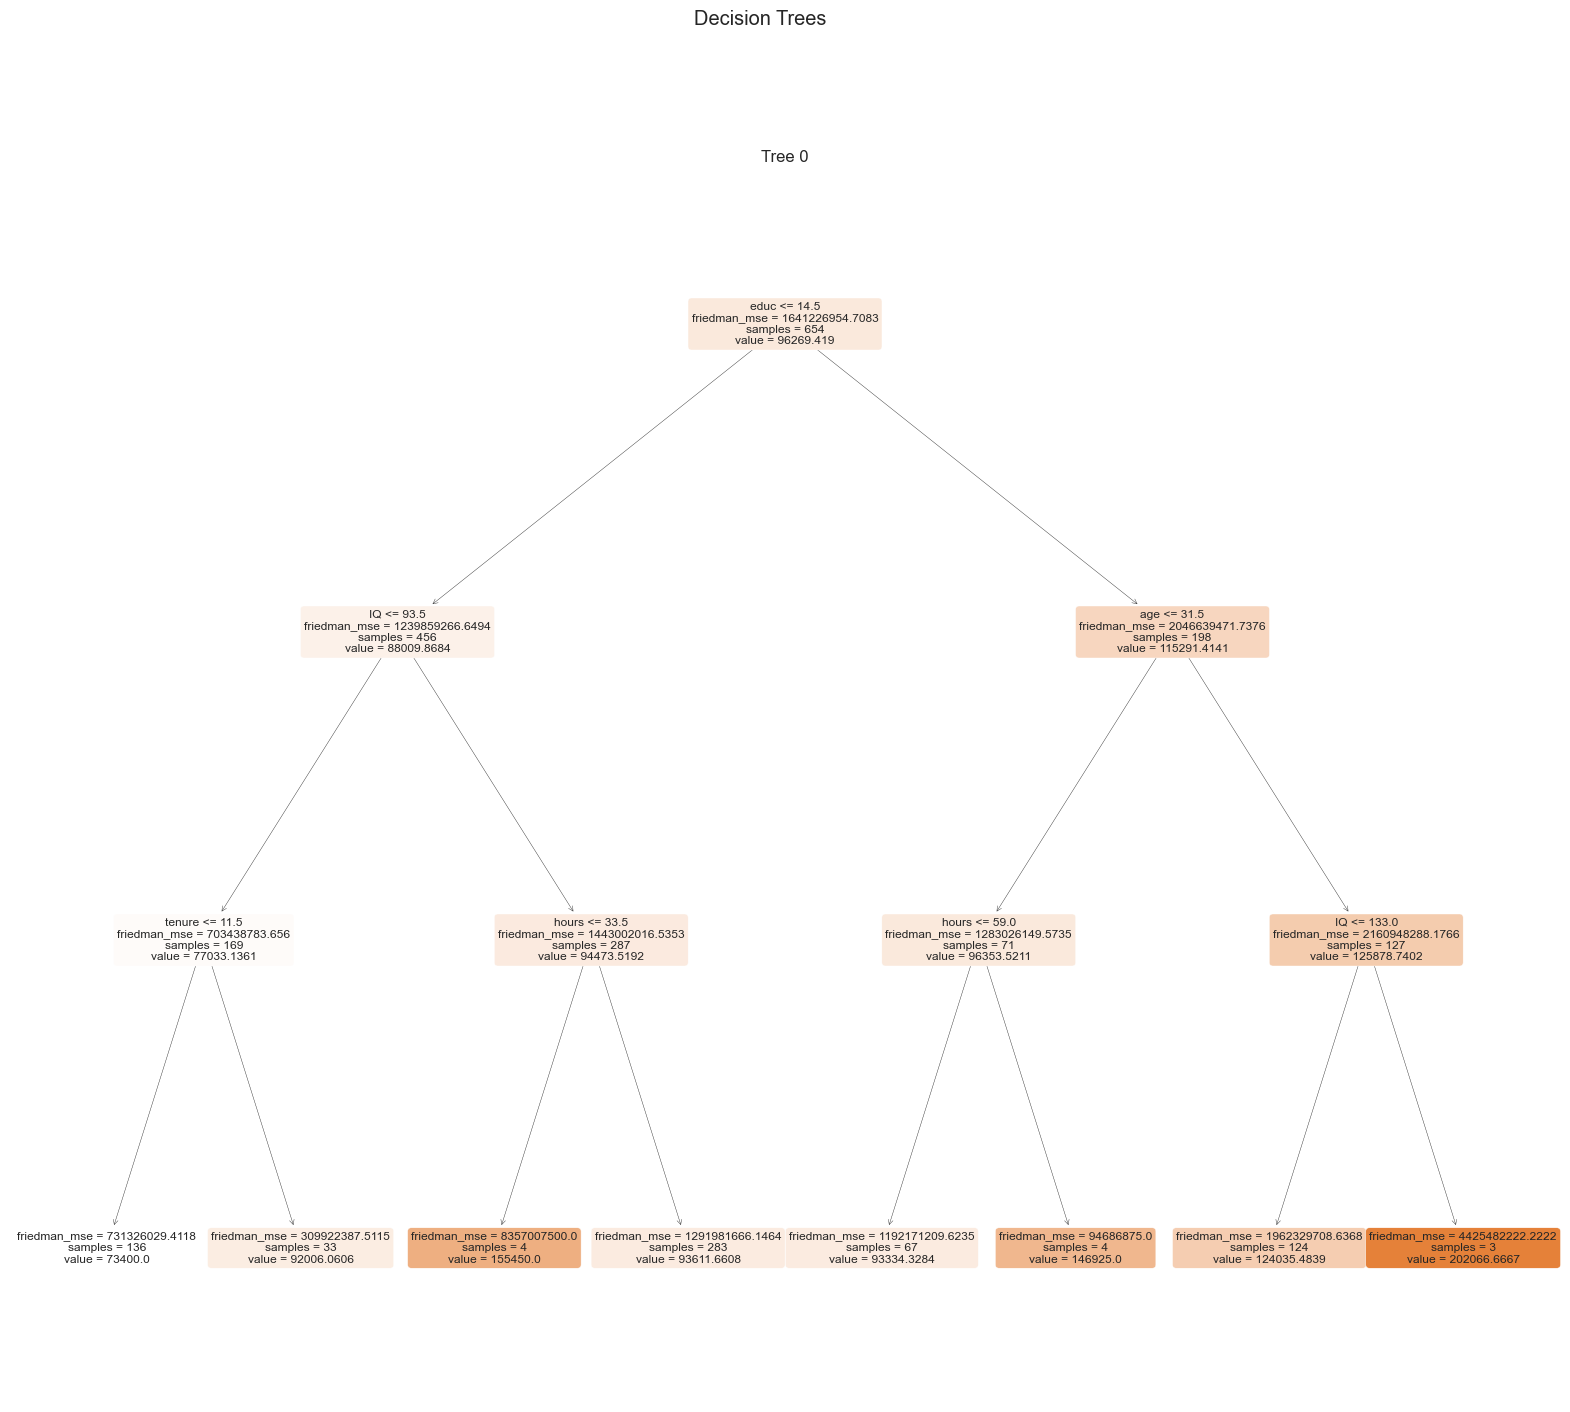

In [ ]:
plot_model(tuned_dt_reg, plot = 'tree')

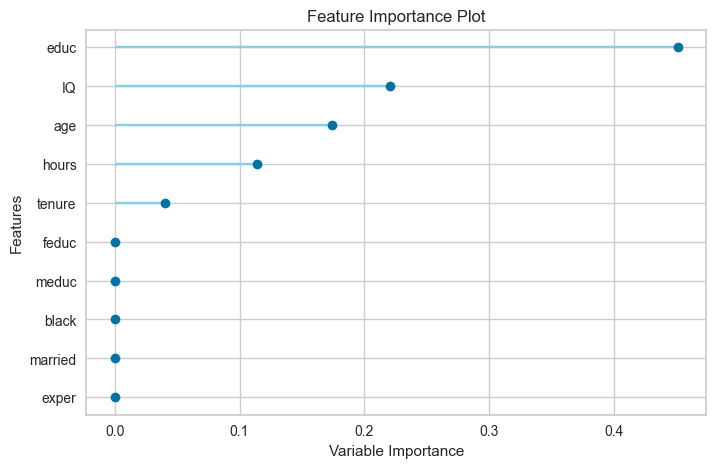

In [ ]:
plot_model(tuned_dt_reg, plot = 'feature')

----
Done!

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install --pre pycaret

In [ ]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [7]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Logan_housing.csv')

In [8]:
df_py.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [9]:
from pycaret.regression import *


In [11]:
setup(data=df_py,  target='Sold Price', session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,Sold Price
2,Target type,Regression
3,Data shape,"(4110, 19)"
4,Train data shape,"(2876, 19)"
5,Test data shape,"(1234, 19)"
6,Ordinal features,2
7,Numeric features,11
8,Categorical features,4
9,Preprocess,True


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [13]:
rf_reg = create_model(estimator='rf') 

In [14]:
tuned_rf_reg = tune_model(rf_reg)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:58:48
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [19]:
plot_model(tuned_rf_reg, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,8
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_samples_leaf,3
min_samples_split,9


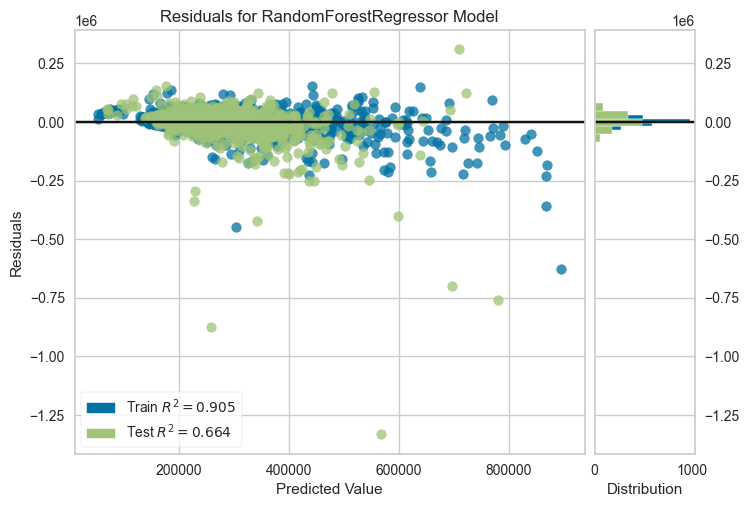

In [16]:
plot_model(tuned_rf_reg, plot = 'residuals')

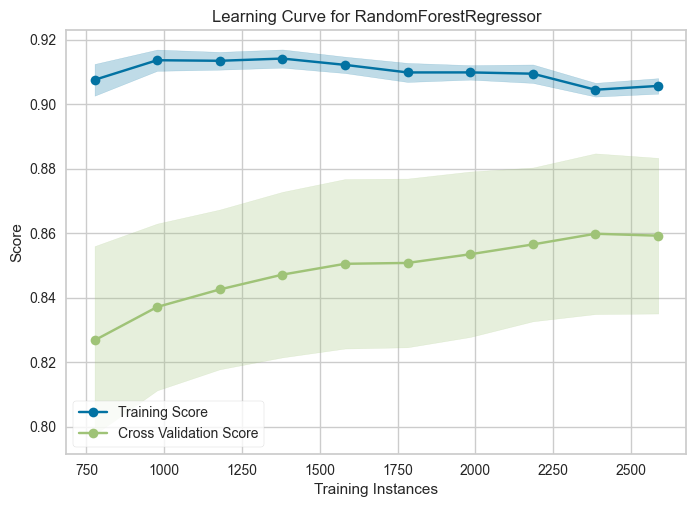

In [17]:
plot_model(tuned_rf_reg, plot = 'learning')

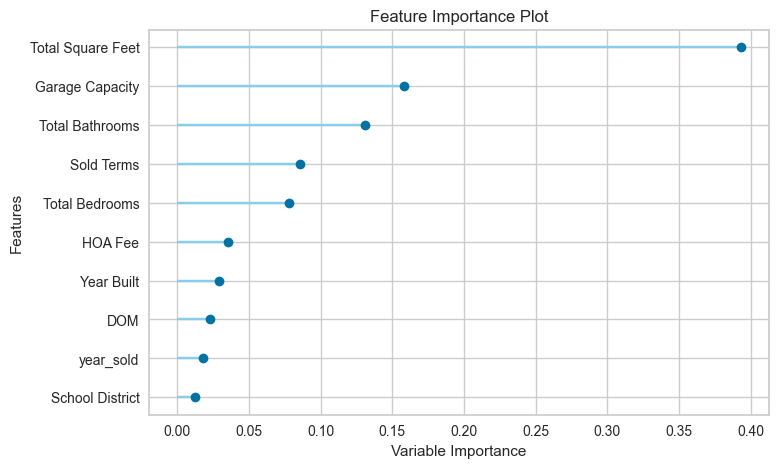

In [18]:
plot_model(tuned_rf_reg, plot = 'feature')

----
Done!

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py